In [3]:
import tensorflow as tf

In [6]:
from tensorflow.examples.tutorials.mnist import input_data

In [7]:
fmnist = input_data.read_data_sets("MNIST_data/")

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [9]:
fmnist

Datasets(train=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7f0dc5cdf8d0>, validation=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7f0dc5c7fd30>, test=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7f0dc5cb0080>)

In [11]:
fmnist.train.images

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32)

In [16]:
fmnist.train.images.shape # 28*28 flattened images

(55000, 784)

In [19]:
fmnist.train.labels.shape, fmnist.train.labels[8]

((55000,), 9)

In [14]:
fmnist.test.images.shape

(10000, 784)

In [20]:
fmnist.validation.images.shape

(5000, 784)

In [21]:
# Y labels must be one hot encoded if we want to apply neural networks having ten units at outcome stage

In [22]:
mnist = input_data.read_data_sets("MNIST/",one_hot = True)
mnist

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST/t10k-labels-idx1-ubyte.gz


Datasets(train=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7f0dc5cb0c18>, validation=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7f0dc5cb0f98>, test=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7f0dc5cb0e48>)

In [24]:
mnist.train.labels

array([[ 0.,  0.,  0., ...,  1.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  1.,  0.]])

In [25]:
# All the above data represented using one hot encoding

In [27]:
mnist.test.labels.shape

(10000, 10)

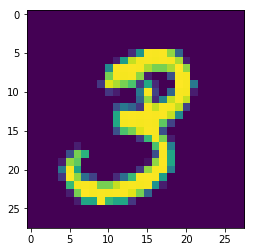

In [32]:
# looking at the images

import matplotlib.pyplot as plt
import numpy as np

narr = np.array(mnist.train.images[1]) # can try this for other images instead of index 1 image
image1 = narr.reshape((28,28))
plt.imshow(image1)
plt.show()

In [37]:
tf.random_normal([3,4])

with tf.Session() as sess:
    print(tf.random_normal([3,5]).eval())

[[-0.1191306  -0.17279276  1.63854647 -0.97544259 -0.56377715]
 [ 0.84612918 -2.01284766 -0.24668828 -0.25327504  1.57746005]
 [-0.28747785 -0.1209371   1.42091453 -0.34862047 -1.4418304 ]]


In [38]:
# Initialising weights and biases
n_input = 784
n_hidden1 = 256
n_hidden2 = 256
n_classes = 10

weights ={
    'h1':tf.random_normal([n_input,n_hidden1]),
    'h2':tf.random_normal([n_hidden1,n_hidden2]),
    'out':tf.random_normal([n_hidden2,n_classes])
}

biases ={
    'h1':tf.random_normal([n_hidden1]),
    'h2':tf.random_normal([n_hidden2]),
    'out':tf.random_normal([n_classes])
}

In [39]:
# forward propagation code with random weights and biases

def forward_propagation(x, weights, biases):
    in_layer1 = tf.add(tf.matmul(x,weights['h1']),biases['h1'])
    out_layer1 = tf.nn.relu(in_layer1)
    
    in_layer2 = tf.add(tf.matmul(out_layer1,weights['h2']),biases['h2'])
    out_layer2 = tf.nn.relu(in_layer2)
    
    output = tf.add(tf.matmul(out_layer2,weights['out']),biases['out'])
    return output

In [84]:
sess1 = tf.Session()
sess1.run(tf.global_variables_initializer())
x = tf.placeholder("float",[None,n_input])
y = tf.placeholder(tf.int32,[None,n_classes])

In [89]:
pred = forward_propagation(x, weights, biases) # x must be a tensor object. Therefore, placeholder created for it 
predictions = tf.argmax(pred,1)
labels = tf.argmax(y,1)
correct = tf.equal(predictions,labels)

In [93]:
predictions_eval = sess.run(predictions, feed_dict = {x:mnist.test.images})
print(predictions_eval)
labels_eval = sess.run(labels, feed_dict={y:mnist.test.labels})
# both the above evals could have been calculated using a single line : sess.run([predictions,labels],feed_dict ={x:,y:})
print(labels_eval)
correct_eval = sess.run(correct,feed_dict = {x:mnist.test.images, y:mnist.test.labels})
print(correct_eval)

[5 9 8 ..., 8 8 3]
[7 2 1 ..., 4 5 6]
[False False False ..., False False False]


In [95]:
correct_eval.sum()

1123

In [98]:
# For training dataset

predictions_eval = sess.run(predictions, feed_dict = {x:mnist.train.images})
print(predictions_eval)
labels_eval = sess.run(labels, feed_dict={y:mnist.train.labels})
# both the above evals could have been calculated using a single line : sess.run([predictions,labels],feed_dict ={x:,y:})
print(labels_eval)
correct_eval = sess.run(correct,feed_dict = {x:mnist.train.images, y:mnist.train.labels})
print(correct_eval)

[8 8 5 ..., 3 3 8]
[7 3 4 ..., 5 6 8]
[False False  True ..., False False False]


In [100]:
correct_eval.sum()

6432

In [101]:
# in both the above, testing data and training data, about 10% accuracy is obtained. (With random weights)